In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read in the cleaned, dummied data
df = pd.read_pickle('/content/drive/MyDrive/data/heart_cleaned_dummy.pkl')

df.reset_index(drop=True, inplace=True)
X = df.iloc[:,:-1]
y = df.HeartDisease
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,45,110,264,0,132,1.2,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1
742,68,144,193,1,141,3.4,0,1,1,0,0,0,0,1,0,1,0,0,1,0,1
743,57,130,131,0,115,1.2,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1
744,57,130,236,0,174,0.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1


In [4]:
logistic = LogisticRegression(penalty='l2', C=1) # instantiate the model
# try l1 penalty(like ridge)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.HeartDisease, test_size=0.2, random_state=1234)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [5]:
# fit the initial model
logistic.fit(X = X_train,y = y_train)
y_pred = logistic.predict(X= X_test)

In [6]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)
# the initial confusion matrix

array([[76,  8],
       [ 6, 60]])

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_pred,y_test)
# pretty good initial accuracy

0.9066666666666666

In [7]:
C_range = []
import numpy as np
C_range = np.linspace(0.01, 0.1,11).round(2).tolist()

for i in np.linspace(0.2, 1.1,11).round(1).tolist():
  C_range.append(i)

for i in range(10,101,10):
  C_range.append(i)

l1_range = []
l1_range = np.linspace(0.1, 0.9,9).round(1).tolist()
l1_range

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [12]:
# using filter methods
# the pipeline integrates univarient feature selection, standardization and logistic regression
# serching through the best number of features to keep, the highest performing input for 'penalty' and 'C' in logistic regression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

logistic = LogisticRegression(solver= 'saga')
scaler = StandardScaler()
anova_filter = SelectKBest(f_classif)
n_range = np.linspace(5,20,20).astype('int').tolist()

pipeline = Pipeline(steps = [('anova',anova_filter),('scaler', scaler), ('estimator', logistic)])
parameters = [{'anova__k': n_range,'estimator__penalty': ['l1', 'l2'], "estimator__C": C_range},
              {'anova__k': n_range,'estimator__penalty' :['none']},
              {'anova__k': n_range,'estimator__penalty': ['elasticnet'], 'estimator__l1_ratio':l1_range, 'estimator__C': C_range}
              ]



clf = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=5)
clf.fit(X = df.iloc[:,:-1], y=df.HeartDisease) 

select_results = pd.DataFrame(clf.cv_results_)[['param_estimator__penalty','param_estimator__C','param_estimator__l1_ratio','param_anova__k','mean_test_score','rank_test_score']]
select_results.sort_values('mean_test_score', ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('anova', SelectKBest()),
                                       ('scaler', StandardScaler()),
                                       ('estimator',
                                        LogisticRegression(solver='saga'))]),
             param_grid=[{'anova__k': [5, 5, 6, 7, 8, 8, 9, 10, 11, 12, 12, 13,
                                       14, 15, 16, 16, 17, 18, 19, 20],
                          'estimator__C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06,
                                           0.06, 0.07, 0.08, 0.09, 0.1, 0.2,
                                           0.3, 0.4, 0.5, 0.6, 0.7, 0.7, 0.8,
                                           0.9, 1.0, 1.1, 10, 20, 30, 40...
                          'estimator__penalty': ['none']},
                         {'anova__k': [5, 5, 6, 7, 8, 8, 9, 10, 11, 12, 12, 13,
                                       14, 15, 16, 16, 17, 18, 19, 20],
                          'estimator__C': [

In [13]:

select_results = pd.DataFrame(clf.cv_results_)[['param_estimator__penalty','param_estimator__C','param_estimator__l1_ratio','param_anova__k','mean_test_score','rank_test_score']]
select_results.sort_values('mean_test_score', ascending=False)
# The best accuracy is .863

,param_estimator__penalty,param_estimator__C,param_estimator__l1_ratio,param_anova__k,mean_test_score,rank_test_score
4226,elasticnet,0.06,0.2,12,0.863239,1
659,l2,0.09,NaN,12,0.863239,1
3938,elasticnet,0.06,0.2,12,0.863239,1
3964,elasticnet,0.08,0.1,12,0.863239,1
595,l2,0.09,NaN,12,0.863239,1
...,...,...,...,...,...,...
3611,elasticnet,0.01,0.8,11,0.805521,7043
2171,elasticnet,0.01,0.8,7,0.805521,7043
3899,elasticnet,0.01,0.8,12,0.805521,7043
5915,elasticnet,0.01,0.8,17,0.805521,7043


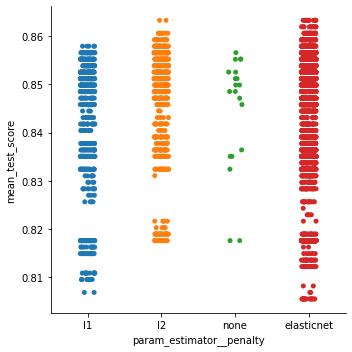

In [15]:
# looks like only 12 features was needed to perform best with logistic regression 
sns.catplot(x = 'param_estimator__penalty', y ='mean_test_score', data = select_results)

Text(0.5499999999999972, 0.5, 'cross-validated accuracy')

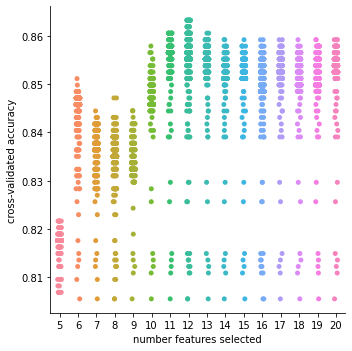

In [17]:
import matplotlib as mp
sns.catplot(x = 'param_anova__k', y ='mean_test_score', data = select_results)
mp.pyplot.xlabel('number features selected')
mp.pyplot.ylabel('cross-validated accuracy')

In [18]:
anova_filter = SelectKBest(score_func = f_classif, k =14)
anova_filter.fit(df.iloc[:,:-1], y = df.iloc[:,-1])
anova_filter.scores_
# the F-scores

array([ 72.83911596,  23.02030868,   8.11385082,  19.69607753,
       123.42507848, 242.36427902,  69.75452452,  69.75452452,
       280.10241717, 122.224882  ,  38.62144431,   2.15690925,
         3.6215047 ,  13.44987484,   6.90900229, 325.76678888,
       325.76678888,  13.23257053, 400.50205245, 555.33746087])

In [19]:
# feature importance rank based on F-Scores
# on the previous graph, showed that only keeping 12 features had the best performace


F_scores = pd.DataFrame(index = df.columns[:-1].tolist())
F_scores['F_scores'] = anova_filter.scores_
F_scores.sort_values('F_scores',ascending= False,inplace=True)
F_scores['rank'] = [i for i in range(1,21)]
F_scores

,F_scores,rank
ST_Slope_Up,555.337461,1
ST_Slope_Flat,400.502052,2
ExerciseAngina,325.766789,3
ExerciseAngina_N,325.766789,4
ChestPainType_ASY,280.102417,5
Oldpeak,242.364279,6
MaxHR,123.425078,7
ChestPainType_ATA,122.224882,8
Age,72.839116,9
Sex,69.754525,10


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

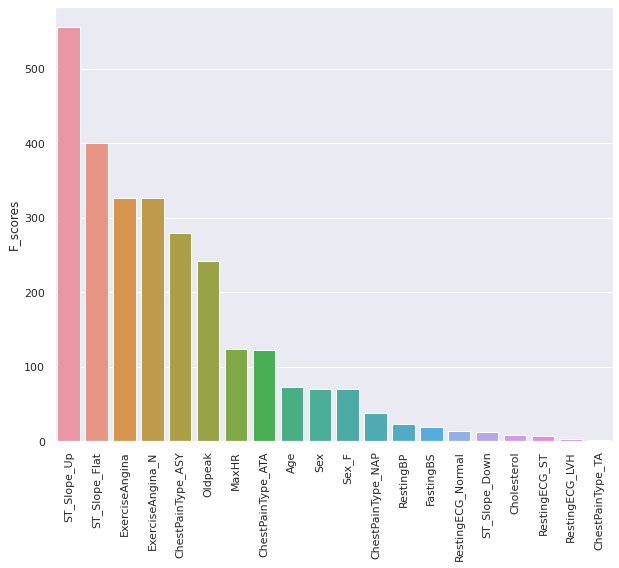

In [22]:
# Graph showing the f-scores of each feature, Keeping on the top 14 so far gave us the best performance for SVM

sns.barplot(x=F_scores.index, y = F_scores.F_scores)
sns.set(rc = {'figure.figsize':(10,8)})
mp.pyplot. xticks(rotation =90)

In [ ]:
C_range = []
import numpy as np
C_range = np.linspace(0.01, 0.1,11).round(2).tolist()

for i in np.linspace(0.2, 1.1,11).round(1).tolist():
  C_range.append(i)

for i in range(10,101,10):
  C_range.append(i)

l1_range = []
l1_range = np.linspace(0.1, 0.9,9).round(1).tolist()
l1_range

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [ ]:
# serch for better metric
# more in-depth 
from sklearn.pipeline import Pipeline
logistic = LogisticRegression(random_state= 1234,solver= 'saga')
parameters = [{'model__penalty': ['l1', 'l2'], "model__C": C_range},
              {'model__penalty' :['none']},
              {'model__penalty': ['elasticnet'], 'model__l1_ratio':l1_range, 'model__C': C_range}
              ]
pipe = Pipeline(steps = [('scaler', scaler),('model',logistic)])
grid = GridSearchCV(estimator= pipe, param_grid= parameters,scoring='accuracy',cv = 5)
grid.fit(X = df.iloc[:,:-1], y = df.HeartDisease)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(random_state=1234,
                                                           solver='saga'))]),
             param_grid=[{'model__C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.06,
                                       0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4,
                                       0.5, 0.6, 0.7, 0.7, 0.8, 0.9, 1.0, 1.1,
                                       10, 20, 30, 40, 50, 60, 70, 80, ...],
                          'model__penalty': ['l1', 'l2']},
                         {'model__penalty': ['none']},
                         {'model__C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.06,
                                       0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4,
                                       0.5, 0.6, 0.7, 0.7, 0.8, 0.9, 1.0, 1.1,
                                       10,

In [ ]:
results = pd.DataFrame(grid.cv_results_)[['param_model__penalty','param_model__C','param_model__l1_ratio','mean_test_score','rank_test_score']]
results.sort_values('rank_test_score',inplace= True)
results
# best results

,param_model__penalty,param_model__C,param_model__l1_ratio,mean_test_score,rank_test_score
148,elasticnet,0.09,0.3,0.859213,1
139,elasticnet,0.08,0.3,0.859213,1
130,elasticnet,0.07,0.3,0.859213,1
66,elasticnet,0.01,0.2,0.859204,4
129,elasticnet,0.07,0.2,0.857888,5
...,...,...,...,...,...
0,l1,0.01,NaN,0.814917,349
71,elasticnet,0.01,0.7,0.813566,350
73,elasticnet,0.01,0.9,0.812233,351
2,l1,0.02,NaN,0.810881,352


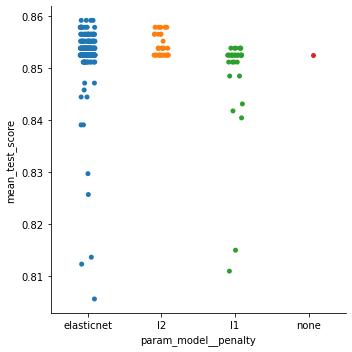

In [ ]:
sns.catplot(x = 'param_model__penalty', y ='mean_test_score', data = results)

In [ ]:
# the best scoring parameter
logistic = LogisticRegression(random_state= 1234,solver= 'saga',penalty='elasticnet',C = 0.09, l1_ratio= 0.3)
scaler = StandardScaler()
pipe = Pipeline(steps = [('scaler', scaler), ('model', logistic)])
from sklearn.model_selection import cross_validate as cross_val 
cross_val_data = cross_val(pipe, X = df.iloc[:,:-1], y = df.HeartDisease, cv = 5, scoring='accuracy')

In [ ]:
cross_val_data['test_score'].mean()

0.8592125279642058

In [ ]:
# best scoring parameter -- feature importance (with coefficients)
logistic = LogisticRegression(random_state= 1234,solver= 'saga',penalty='elasticnet',C = 0.09, l1_ratio= 0.3)
pipe = Pipeline(steps = [('scaler', scaler), ('model', logistic)])
pipe.fit(df.iloc[:,:-1], df.HeartDisease)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=0.09, l1_ratio=0.3, penalty='elasticnet',
                                    random_state=1234, solver='saga'))])

In [ ]:
coef = pipe['model'].coef_
names = df.columns[:-1]


array([ 0.23595826,  0.14402865,  0.09980031,  0.08291799, -0.01757717,
        0.38002585, -0.32492265,  0.32492265,  0.60933339, -0.10113294,
       -0.04901578, -0.00636528,  0.03572512, -0.031667  ,  0.        ,
       -0.21992974,  0.21992974,  0.        ,  0.53876929, -0.58077796])

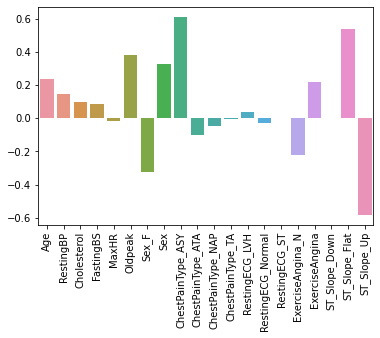

In [ ]:
p=sns.barplot(x=names, y=coef[0])
# feature importance according to coefficients of linear best accuracy logistic regression fit
p = p.set_xticklabels(labels=df.columns[:-1], rotation=90)

In [ ]:
# attempt of feature selection through RFECV

from sklearn.feature_selection import RFECV  # selects the best number of features based on cross validated estimator performance
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html
from sklearn.feature_selection import RFE    #simply selects the specified number of features based on importance
#Importing the Recursive Feature Selection package
scaler = StandardScaler()
logistic = LogisticRegression(random_state= 1234,solver= 'saga',penalty='elasticnet',C = 0.09, l1_ratio= 0.3)
pipe = Pipeline(steps = [('scaler', scaler), ('model', logistic)])

# creating standardize data set
y = df.HeartDisease
df1 = pd.DataFrame(scaler.fit_transform(df.iloc[:,:-1]),columns=df.columns[:-1])
df1['HeartDisease'] = y


In [ ]:
# finding the most important features
rfecv = RFECV(estimator= logistic, cv=5, scoring="accuracy")
rfecv.fit(X = df1.iloc[:,:-1], y=df1.HeartDisease)
print('Selected', rfecv.n_features_, 'features:')
X.columns[rfecv.support_]

Selected 15 features:


Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'Oldpeak', 'Sex_F',
       'Sex', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'RestingECG_Normal', 'ExerciseAngina_N', 'ExerciseAngina',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [ ]:
selected_features = []
for i in X.columns[rfecv.support_]:
  selected_features.append(i)
selected_features

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'Oldpeak',
 'Sex_F',
 'Sex',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'RestingECG_Normal',
 'ExerciseAngina_N',
 'ExerciseAngina',
 'ST_Slope_Flat',
 'ST_Slope_Up']

In [ ]:
rank = list(rfecv.ranking_)
inverted_rank = []
for i in rank:
  inverted_rank.append(1/i)
inverted_rank 

[1.0,
 1.0,
 1.0,
 1.0,
 0.3333333333333333,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.25,
 0.5,
 1.0,
 0.2,
 1.0,
 1.0,
 0.16666666666666666,
 1.0,
 1.0]

In [ ]:
rank_chart = pd.DataFrame(index= df.columns[:-1], data= rank,columns =['rank'])
rank_chart.sort_values('rank',inplace= True)
rank_chart
# the rank of features based on RFECV( Cross-validated Recursive Feature Selection)

,rank
Age,1
ExerciseAngina,1
ExerciseAngina_N,1
RestingECG_Normal,1
ChestPainType_NAP,1
ST_Slope_Flat,1
ChestPainType_ASY,1
ChestPainType_ATA,1
Sex_F,1
Oldpeak,1


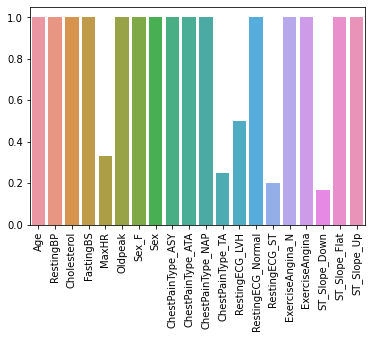

In [ ]:
d=sns.barplot(x=df.columns[:-1], y=inverted_rank)
# shows which features was deemed neccessary by Cross-validated Recursive Feature Selection
d = d.set_xticklabels(labels=df.columns[:-1], rotation=90)

In [ ]:
## only use selected features
df2 = df[selected_features]
df2

,Age,RestingBP,Cholesterol,FastingBS,Oldpeak,Sex_F,Sex,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,RestingECG_Normal,ExerciseAngina_N,ExerciseAngina,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,0.0,0,1,0,1,0,1,1,0,0,1
1,49,160,180,0,1.0,1,0,0,0,1,1,1,0,1,0
2,37,130,283,0,0.0,0,1,0,1,0,0,1,0,0,1
3,48,138,214,0,1.5,1,0,1,0,0,1,0,1,1,0
4,54,150,195,0,0.0,0,1,0,0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,45,110,264,0,1.2,0,1,0,0,0,1,1,0,1,0
742,68,144,193,1,3.4,0,1,1,0,0,1,1,0,1,0
743,57,130,131,0,1.2,0,1,1,0,0,1,0,1,1,0
744,57,130,236,0,0.0,1,0,0,1,0,0,1,0,1,0


In [ ]:
df2['HeartDisease'] = y
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Age,RestingBP,Cholesterol,FastingBS,Oldpeak,Sex_F,Sex,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,RestingECG_Normal,ExerciseAngina_N,ExerciseAngina,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,0.0,0,1,0,1,0,1,1,0,0,1,0
1,49,160,180,0,1.0,1,0,0,0,1,1,1,0,1,0,1
2,37,130,283,0,0.0,0,1,0,1,0,0,1,0,0,1,0
3,48,138,214,0,1.5,1,0,1,0,0,1,0,1,1,0,1
4,54,150,195,0,0.0,0,1,0,0,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,45,110,264,0,1.2,0,1,0,0,0,1,1,0,1,0,1
742,68,144,193,1,3.4,0,1,1,0,0,1,1,0,1,0,1
743,57,130,131,0,1.2,0,1,1,0,0,1,0,1,1,0,1
744,57,130,236,0,0.0,1,0,0,1,0,0,1,0,1,0,1


In [ ]:
C_range = []
import numpy as np
C_range = np.linspace(0.01, 0.1,11).round(2).tolist()

for i in np.linspace(0.2, 1.1,11).round(1).tolist():
  C_range.append(i)

for i in range(10,101,10):
  C_range.append(i)

l1_range = []
l1_range = np.linspace(0.1, 0.9,9).round(1).tolist()
l1_range

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [ ]:
from sklearn.pipeline import Pipeline
logistic = LogisticRegression(random_state= 1234,solver= 'saga')
parameters = [{'model__penalty': ['l1', 'l2'], "model__C": C_range},
              {'model__penalty' :['none']},
              {'model__penalty': ['elasticnet'], 'model__l1_ratio':l1_range, 'model__C': C_range}
              ]
pipe = Pipeline(steps = [('scaler', scaler),('model',logistic)])
grid = GridSearchCV(estimator= pipe, param_grid= parameters,scoring='accuracy',cv = 5)
grid.fit(X = df2.iloc[:,:-1], y = df2.HeartDisease)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(random_state=1234,
                                                           solver='saga'))]),
             param_grid=[{'model__C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.06,
                                       0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4,
                                       0.5, 0.6, 0.7, 0.7, 0.8, 0.9, 1.0, 1.1,
                                       10, 20, 30, 40, 50, 60, 70, 80, ...],
                          'model__penalty': ['l1', 'l2']},
                         {'model__penalty': ['none']},
                         {'model__C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.06,
                                       0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4,
                                       0.5, 0.6, 0.7, 0.7, 0.8, 0.9, 1.0, 1.1,
                                       10,

In [ ]:
results_selected = pd.DataFrame(grid.cv_results_)[['param_model__penalty','param_model__C','param_model__l1_ratio','mean_test_score','rank_test_score']]
results_selected.sort_values('rank_test_score',inplace= True)
results_selected
# best results -- we actually see improved performance 

,param_model__penalty,param_model__C,param_model__l1_ratio,mean_test_score,rank_test_score
83,elasticnet,0.03,0.1,0.863239,1
92,elasticnet,0.04,0.1,0.861906,2
101,elasticnet,0.05,0.1,0.860564,3
74,elasticnet,0.02,0.1,0.860555,4
3,l2,0.02,NaN,0.859230,5
...,...,...,...,...,...
0,l1,0.01,NaN,0.814917,349
71,elasticnet,0.01,0.7,0.813566,350
73,elasticnet,0.01,0.9,0.812233,351
2,l1,0.02,NaN,0.810881,352


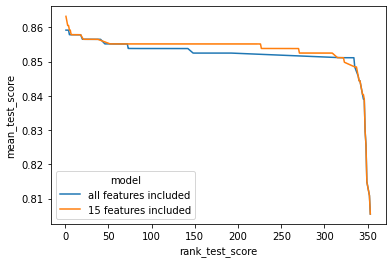

In [ ]:
#result comparison -- slightly better performance
results['model'] = 'all features included'
results_selected['model'] = '15 features included'
all_results = pd.concat([results, results_selected], ignore_index=True)
all_results.mean_test_score.sort_values

sns.lineplot(x='rank_test_score', y='mean_test_score', hue='model', data=all_results)

In [ ]:
# feature importance based on coefficients after selection
logistic = LogisticRegression(random_state= 1234,solver= 'saga',penalty='elasticnet',C = 0.03, l1_ratio= 0.1)
pipe = Pipeline(steps = [('scaler', scaler), ('model', logistic)])
pipe.fit(df2.iloc[:,:-1], df2.HeartDisease)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=0.03, l1_ratio=0.1, penalty='elasticnet',
                                    random_state=1234, solver='saga'))])

In [ ]:
coef_selected

array([[ 0.18731743,  0.11619781,  0.08404109,  0.08260126, -0.07053773,
         0.33660529, -0.26896948,  0.26896948,  0.41254965, -0.1873311 ,
        -0.13376709, -0.04329773,  0.03448431, -0.03883446,  0.        ,
        -0.22060665,  0.22060665,  0.        ,  0.46874086, -0.50802381]])

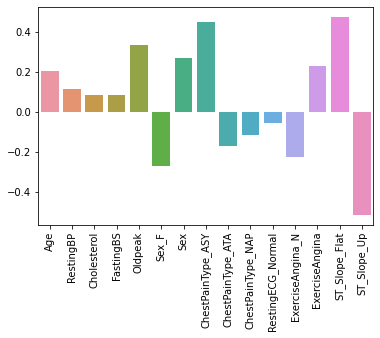

In [ ]:
coef_selected = pipe['model'].coef_
names_selected = df2.columns[:-1]
s=sns.barplot(x=names_selected, y=coef_selected[0])

s = s.set_xticklabels(labels=df2.columns[:-1], rotation=90)

In [24]:
# using PCA to attempt to increase performance 

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

pca = PCA()
logistic = LogisticRegression(solver= 'saga')
scaler = StandardScaler()
anova_filter = SelectKBest(f_classif)
n_range = np.linspace(12,15,4).astype('int').tolist()
pca_range = np.linspace(2,10,9).astype('int').tolist()

pipeline = Pipeline(steps = [('anova',anova_filter),('scaler', scaler),('pca', pca), ('estimator', logistic)])
parameters = [{'anova__k': n_range,'pca__n_components': pca_range,'estimator__penalty': ['l1', 'l2'], "estimator__C": C_range},
              {'anova__k': n_range,'pca__n_components': pca_range,'estimator__penalty' :['none']},
              {'anova__k': n_range,'pca__n_components': pca_range,'estimator__penalty': ['elasticnet'], 'estimator__l1_ratio':l1_range, 'estimator__C': C_range}
              ]



clf = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=5)
clf.fit(X = df.iloc[:,:-1], y=df.HeartDisease) 

pca_results = pd.DataFrame(clf.cv_results_)[['param_estimator__penalty','param_estimator__C','param_estimator__l1_ratio','param_anova__k','mean_test_score','rank_test_score']]
pca_results.sort_values('mean_test_score', ascending=False)

,param_estimator__penalty,param_estimator__C,param_estimator__l1_ratio,param_anova__k,mean_test_score,rank_test_score
5025,elasticnet,0.02,0.2,13,0.868635,1
4152,elasticnet,10,0.4,12,0.868609,2
417,l1,20,NaN,12,0.868609,2
4161,elasticnet,10,0.5,12,0.868609,2
4188,elasticnet,10,0.8,12,0.868609,2
...,...,...,...,...,...,...
1872,l1,0.08,NaN,15,0.841817,12701
10836,elasticnet,0.08,0.9,15,0.841817,12701
10827,elasticnet,0.08,0.8,15,0.841817,12701
10746,elasticnet,0.07,0.8,15,0.841817,12701


In [33]:
pca_results = pd.DataFrame(clf.cv_results_)[['param_estimator__penalty','param_estimator__C','param_estimator__l1_ratio','param_anova__k','param_pca__n_components','mean_test_score','rank_test_score']]
pca_results.rename(columns= {'param_estimator__penalty': 'penalty type','param_estimator__C': 'C-value','param_estimator__l1_ratio': 'l1-ratio(elasticnet)','param_anova__k':'number of features kept','param_pca__n_components': 'number of PCA components', 'mean_test_score':'cross-validated accuracy'}, inplace=True)
pca_results.sort_values('cross-validated accuracy', ascending=False)

,penalty type,C-value,l1-ratio(elasticnet),number of features kept,number of PCA components,cross-validated accuracy,rank_test_score
5025,elasticnet,0.02,0.2,13,5,0.868635,1
4152,elasticnet,10,0.4,12,5,0.868609,2
417,l1,20,NaN,12,5,0.868609,2
4161,elasticnet,10,0.5,12,5,0.868609,2
4188,elasticnet,10,0.8,12,5,0.868609,2
...,...,...,...,...,...,...,...
1872,l1,0.08,NaN,15,2,0.841817,12701
10836,elasticnet,0.08,0.9,15,2,0.841817,12701
10827,elasticnet,0.08,0.8,15,2,0.841817,12701
10746,elasticnet,0.07,0.8,15,2,0.841817,12701


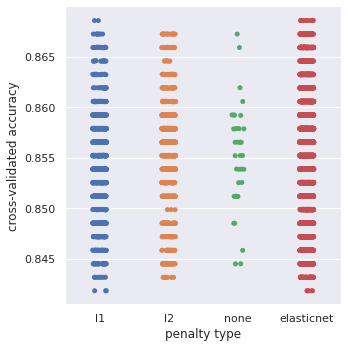

In [35]:
sns.catplot(x = 'penalty type', y ='cross-validated accuracy', data = pca_results)